<a href="https://colab.research.google.com/github/itan-s/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales

- Kristan Bryan Simbulan

##Project Overview

This project is a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

The dataset to be used is sourced from the **Big Mart Sales Practice Problem** at Analytics Vidhya.


The dataset dictionary is as follows:

* ***Item_Identifier*** -	Product ID

* ***Item_Weight***	- Weight of product

* ***Item_Fat_Content*** - Whether the product is low-fat or regular

* ***Item_Visibility***	- The percentage of total display area of all products in a store allocated to the particular product

* ***Item_Type*** -	The category to which the product belongs

* ***Item_MRP***	- Maximum Retail Price (list price) of the product

* ***Outlet_Identifier***	- Store ID

* ***Outlet_Establishment_Year***	- The year in which store was established

* ***Outlet_Size***	- The size of the store in terms of ground area covered

* ***Outlet_Location_Type***	- The type of area in which the store is located

* ***Outlet_Type***	- Whether the outlet is a grocery store or some sort of supermarket

* ***Item_Outlet_Sales***	- Sales of the product in the particular store. This is the target variable to be predicted.

## Load and Inspect Data

In [31]:
# Import the necessary libraries for data analysis
import numpy as np
import pandas as pd
import missingno as msno

In [9]:
# Read the dataset csv file from the source and save it on dataframe df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CodingDojo/sales_predictions_2023.csv')

In [10]:
# Check the columns, their respective data types, and number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
# Check the first five lines of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


SUMMARY:  

*   There are 8523 entries (rows) and 12 features (columns).
*   All columns have correctly assigned data types.
*   No columns were dropped as all of them are useful in the succeeding analysis.

## Clean Data




### [1] Check for duplicated rows


In [24]:
# Identify the duplicated rows and find their total number
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

SUMMARY: No duplicate rows present in the dataframe

### [2] Check Unique Identifiers

In [23]:
# Find the numnber of unique values per column/feature
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [16]:
# Find the percentage of unique values per column/feature
df.nunique()/len(df) *100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

SUMMARY: No valid unique identifier can be set as an index

### [3] Identify and Impute Missing Values

In [29]:
# Get the number of null values for all columns
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [30]:
#  Get the percentage of null values for all columns
null_sums/len(df) *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

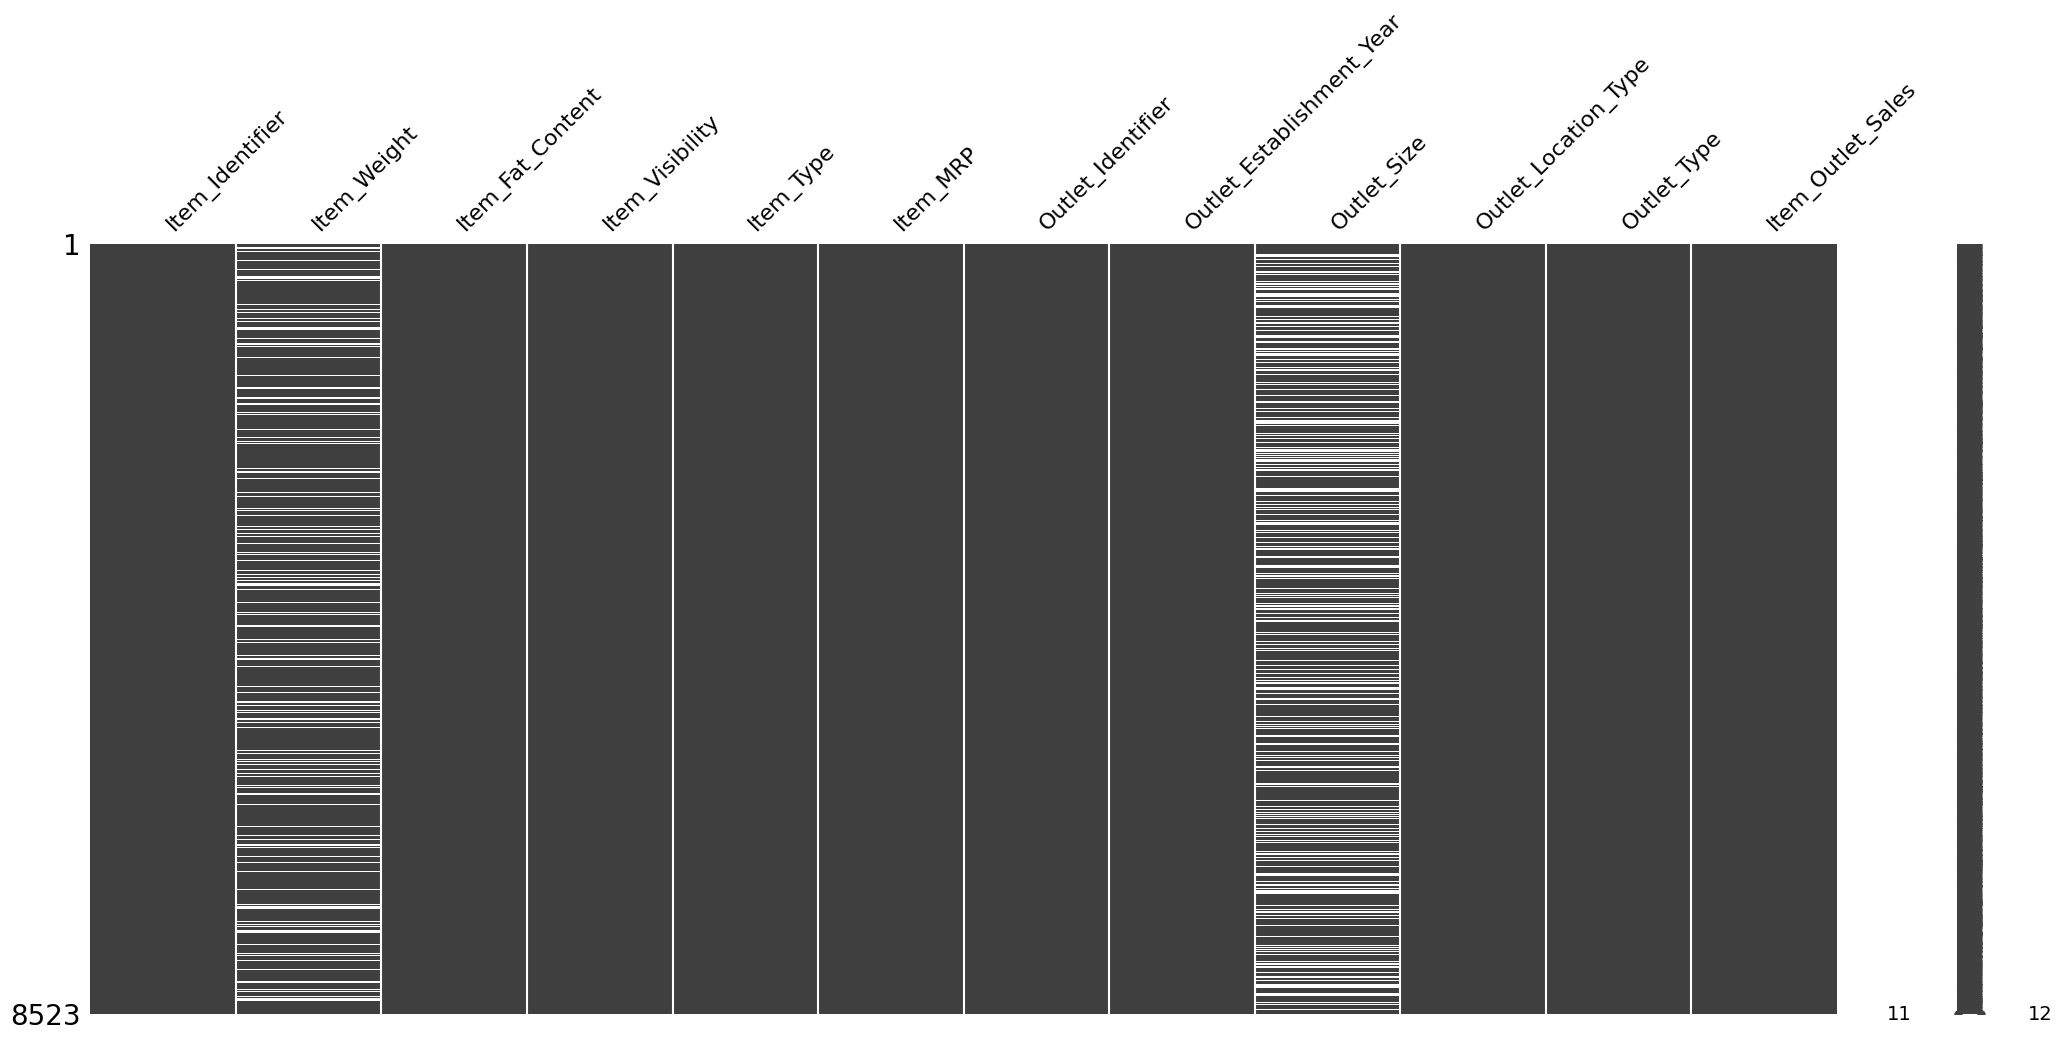

In [33]:
# Visualization of the missing values
msno.matrix(df);

Replace missing values in categorical columns with "MISSING"

In [37]:
# Create a list of categorical column names
cat_columns = df.select_dtypes('object').columns

# Use the list of categorical columns to fill null values with MISSING
df[cat_columns] = df[cat_columns].fillna('MISSING')

# Confirm nulls in categorical columns are replaced successfully
df[cat_columns].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

Note: Null values in the categorical variable 'Outlet_Size' are successfully replaced with 'MISSING'.

Replace missing values in numerical columns with -1

In [38]:
# Create a list of numeric column names
num_columns = df.select_dtypes('number').columns

# Use the list of numerical columns to fill null values with -1
df[num_columns] = df[num_columns].fillna(-1)

# Confirm nulls in numerical columns are replaced successfully
df[num_columns].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

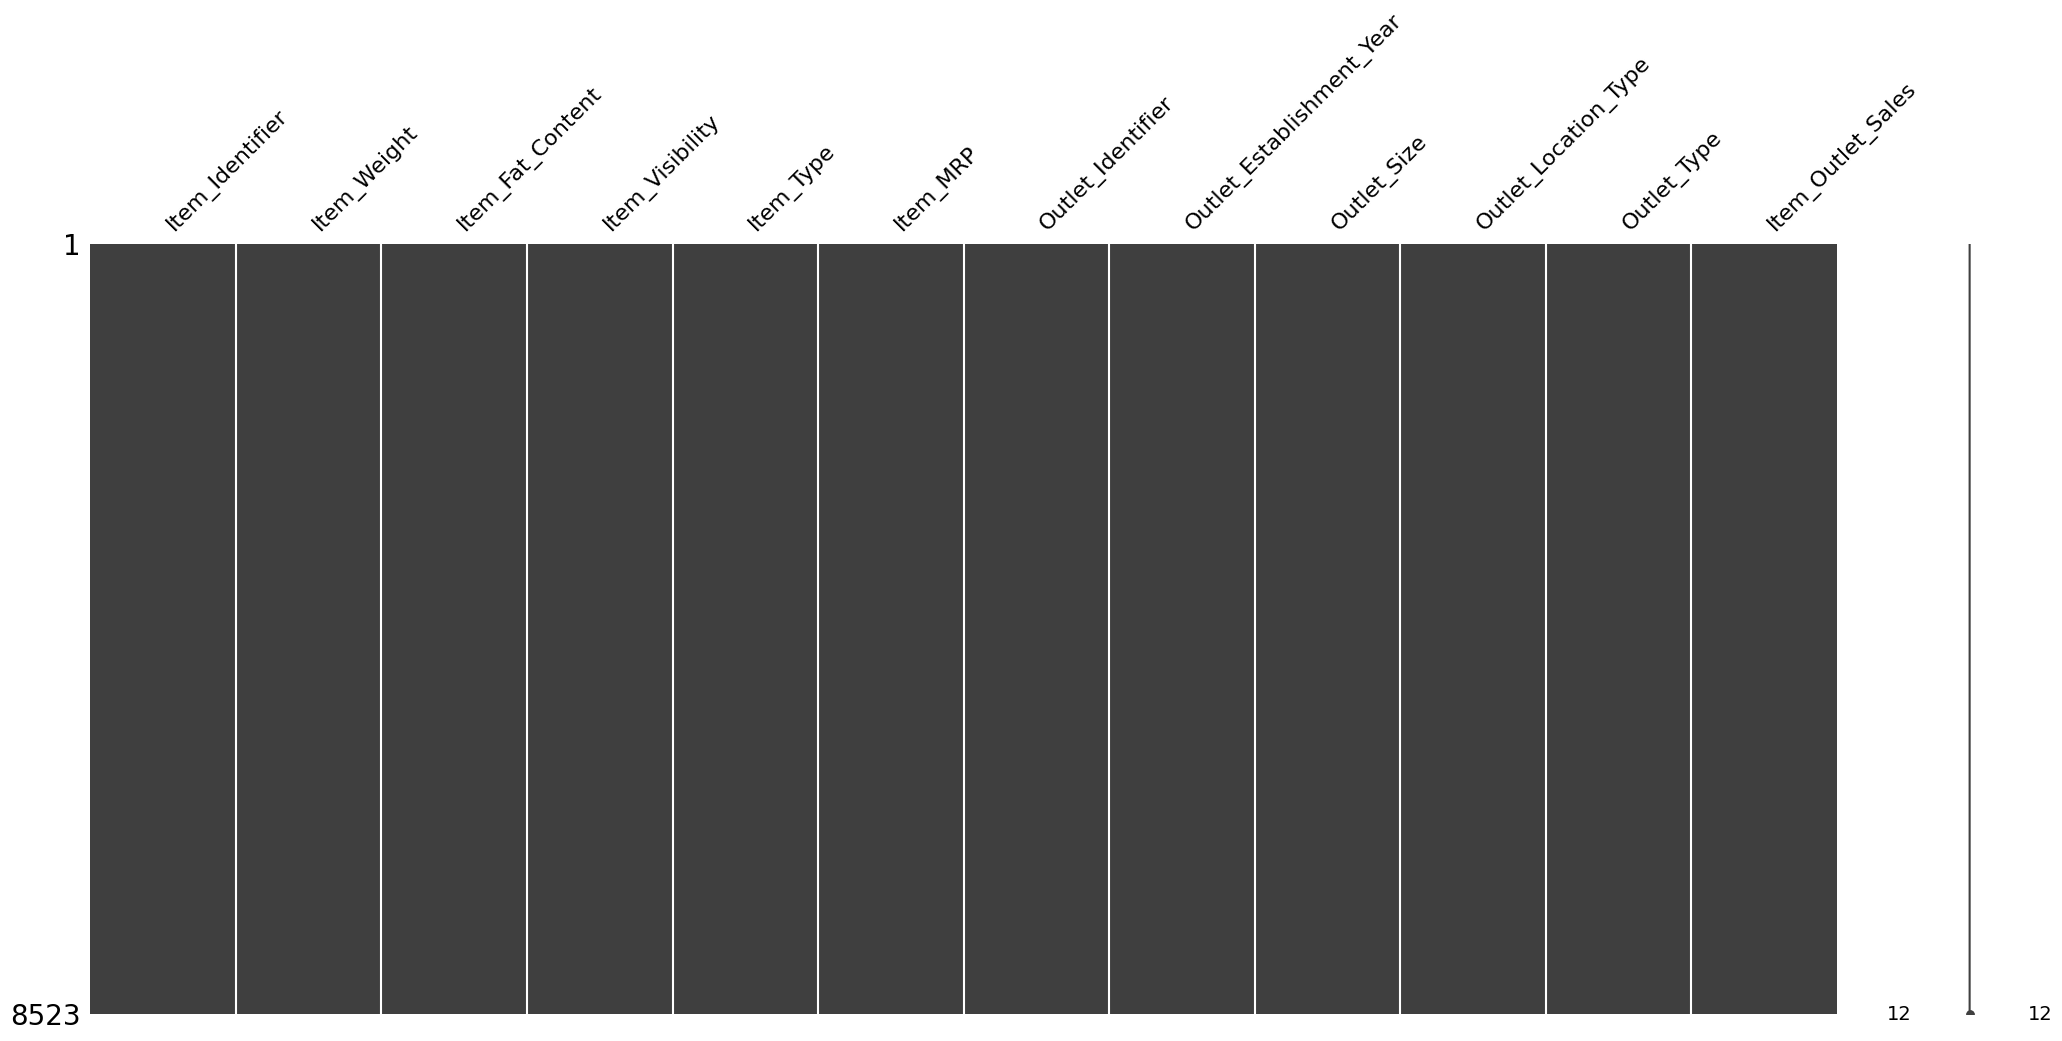

In [39]:
# Recheck visualization of the missing values to reconfirm absence of missing values
msno.matrix(df);

SUMMARY: All missing values are imputed accordingly.

### [4] Check and Fix Consistency

In [40]:
# Save a list of string columns
obj_columns = df.select_dtypes('object').columns

# Check the # of unique values for the string columns
df[obj_columns].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

Note: Will not check the Item_identifier for consistency since it is not possible to know if the identifier is indeed consistent due to its many possible values.

In [43]:
# Save to a variable the list of all the columns that will be checked for consistency
obj_columns = df.select_dtypes('object').drop(columns = 'Item_Identifier').columns

In [44]:
# loop through the list of string columns to check for value consistency
for col in obj_columns:
  # print the value counts for the column
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Sup

Note: For the ***Item_Fat_Content*** column, the values should only be either 'Low Fat' or 'Regular'. Meanwhile, for the ***Outlet_Size*** column, values should either be Small, Medium, or Large.

In [45]:
# Replace miscoded entries in the Item_Fat_Content column with the expected values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})
# Check the value counts again to confirm
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [46]:
# Replace miscoded entries in the Outlet_Size column with the expected values
df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')
# Check the value counts again to confirm
df['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

SUMMARY: The dataframe was checked for consistency. Certain columns are fixed to make their values consistent with the expectation.

## Exploratory Data Analysis

## Feature Inspection